# Customer Churn Prediction

## Project Description

Customer churn occurs when customers stop doing business with a company or services. It is also referred as loss of clients or customers. One industry in which churn rates are particularly useful is the telecommunications industry, because most customers have multiple options from which to choose within a geographic location. 

## Dataset

- customerID
- gender (female, male)
- SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))
- Partner (Whether the customer has a partner or not (Yes, No))
- Dependents (Whether the customer has dependents or not (Yes, No))
- tenure (Number of months the customer has stayed with the company)
- PhoneService (Whether the customer has a phone service or not (Yes, No))
- MultipleLines (Whether the customer has multiple lines r not (Yes, No, No phone service)
- InternetService (Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service) 
- OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)
- streamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)
- streamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract (The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))
- PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))
- MonthlyCharges (The amount charged to the customer monthly — numeric)
- TotalCharges (The total amount charged to the customer — numeric)
- Churn (Whether the customer churned or not (Yes or No))

### Import packages

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set(style='ticks', color_codes=True, font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Overview

In [2]:
df = pd.read_csv('TelcoCustomerChurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## 2. Data Manipulation

In [7]:
df['TotalCharges'].value_counts().head()

20.2     11
         11
19.75     9
19.9      8
20.05     8
Name: TotalCharges, dtype: int64

In [8]:
# Replacing spaces with null values in total charges column
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [9]:
# Dropping null values from total charges column which contain .15% missing data 
df = df[df['TotalCharges'].notnull()]
df = df.reset_index()[df.columns]

In [10]:
# convert to float type
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
# replace values
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [12]:
# replace 'No internet service' to 'No' for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [13]:
# replace 'No phone service' to 'No' for MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service' : 'No'})

In [14]:
# Tenure to categorical column
def tenure_lab(df) :
    
    if df['tenure'] <= 12 :
        return 'Tenure_0-12'
    elif (df['tenure'] > 12) & (df['tenure'] <= 24 ):
        return 'Tenure_12-24'
    elif (df['tenure'] > 24) & (df['tenure'] <= 48) :
        return 'Tenure_24-48'
    elif (df['tenure'] > 48) & (df['tenure'] <= 60) :
        return 'Tenure_48-60'
    elif df['tenure'] > 60 :
        return 'Tenure_gt_60'
df['tenure_group'] = df.apply(lambda df: tenure_lab(df), axis = 1)

In [15]:
# Separating churn and non churn customers
churn     = df[df['Churn'] == 'Yes']
not_churn = df[df['Churn'] == 'No']

In [16]:
# # Separating catagorical and numerical columns
# Id_col     = ['customerID']
# target_col = ['Churn']
# cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# cat_cols   = [x for x in cat_cols if x not in target_col]
# num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

## 3. Exploratory Data Analysis

### 3.1 Churn vs Non Churn

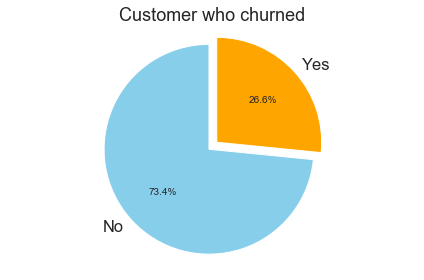

In [17]:
labels = ['No', 'Yes']
sizes = df['Churn'].value_counts()
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors = ['skyblue', 'orange'], autopct='%1.1f%%',
        shadow = False, startangle=90)
ax.set_title('Customer who churned')
ax.axis('equal')
plt.tight_layout()

### 3.2 Senior Citizen vs Churn

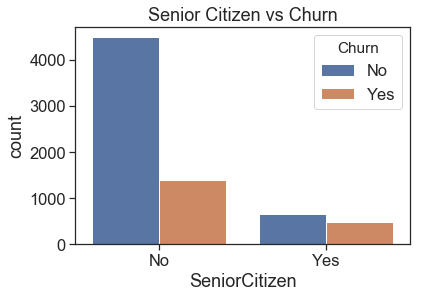

In [18]:
sns.countplot(x='SeniorCitizen', hue ='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.show()

Senior citizen has a higher tendency to churn the service.

### 3.3 Gender vs Churn

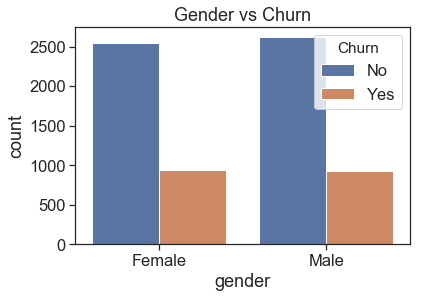

In [19]:
sns.countplot(x='gender', hue ='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

No difference between female and male.

### 3.4 Partner vs Churn

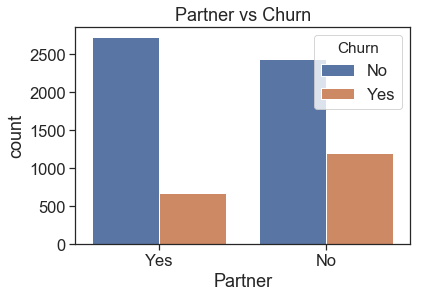

In [20]:
sns.countplot(x='Partner', hue ='Churn', data=df)
plt.title('Partner vs Churn')
plt.show()

Customers who do not have a partner have a higher tendency to churn the service.

### 3.5 Dependents vs Churn

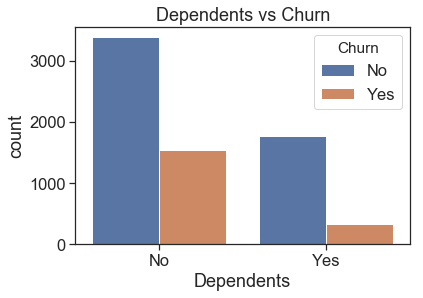

In [21]:
sns.countplot(x='Dependents', hue ='Churn', data=df)
plt.title('Dependents vs Churn')
plt.show()

 Customer who do not have dependents have a higher tendency to churn the service.
 
 ### 3.6 Phone Service vs Churn

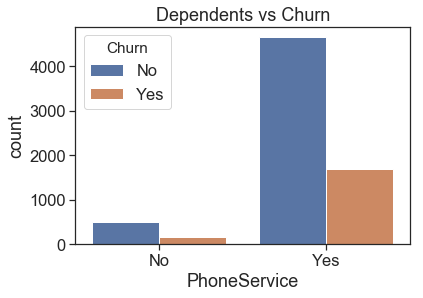

In [22]:
sns.countplot(x='PhoneService', hue ='Churn', data=df)
plt.title('Dependents vs Churn')
plt.show()

Not much difference of churn in Phone Service.

### 3.7 MultipleLines vs Churn

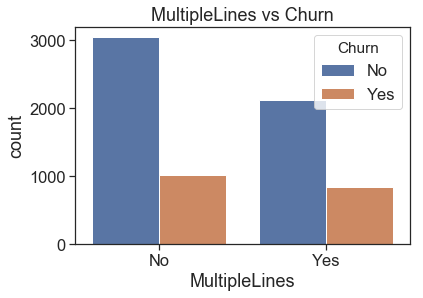

In [23]:
sns.countplot(x='MultipleLines', hue ='Churn', data=df)
plt.title('MultipleLines vs Churn')
plt.show()

Customers who have Multiple Lines have a higher tendency to churn the service.

### 3.8 Internet Service vs Churn

In [24]:
df_81 = df[df['Churn']=='Yes'][['InternetService']]
df_82 = df[df['Churn']=='No'][['InternetService']]
print("churn: \n", df_81['InternetService'].value_counts(), "\n")
print("non churn: \n", df_82['InternetService'].value_counts())

churn: 
 Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64 

non churn: 
 DSL            1957
Fiber optic    1799
No             1407
Name: InternetService, dtype: int64


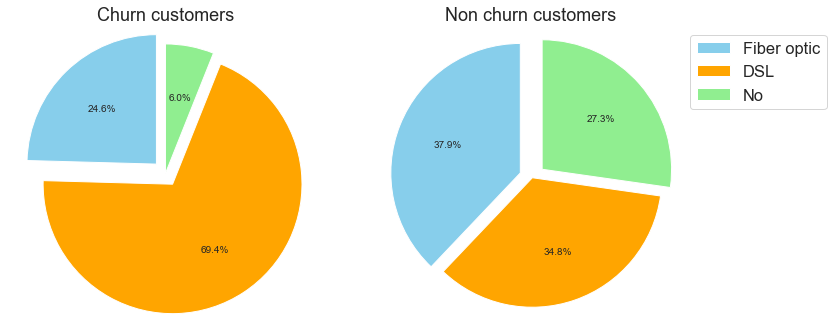

In [25]:
fig = plt.figure(figsize=(12,12))
labels = 'Fiber optic','DSL','No'
ax1 = plt.subplot(221)
sizes = df_81['InternetService'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue','orange','lightgreen'], 
       explode = (0.1, 0.1, 0),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax1.set_title('Churn customers')
ax1.axis('equal')

ax2 = plt.subplot(222)
sizes = df_82['InternetService'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue','orange','lightgreen'],
       explode = (0.1, 0, 0.1),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax2.set_title('Non churn customers')
ax2.axis('equal')

ax1.legend(labels=labels, bbox_to_anchor=(2.7, 1))
plt.show()

Churned customers tend to use DSL internet service than non-churn customers.

### 3.9 Online Security vs Churn

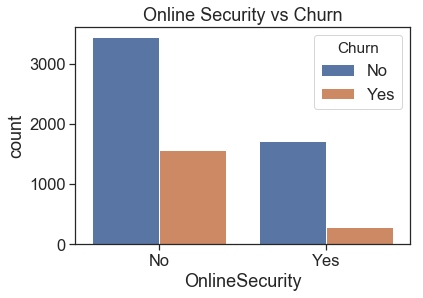

In [26]:
sns.countplot(x='OnlineSecurity', hue ='Churn', data=df)
plt.title('Online Security vs Churn')
plt.show()

Customers who don't have online security have a higher tendency to churn the service.

### 3.10 Online Backup vs Churn

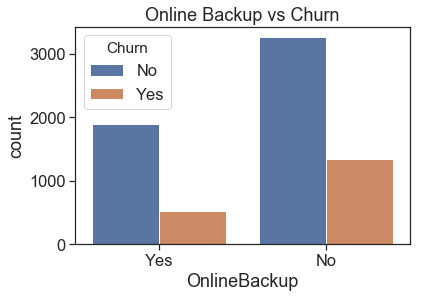

In [27]:
sns.countplot(x='OnlineBackup', hue ='Churn', data=df)
plt.title('Online Backup vs Churn')
plt.show()

Customers who don't have online backup have a higher tendency to churn the service.

### 3.11 Device Protection vs Churn

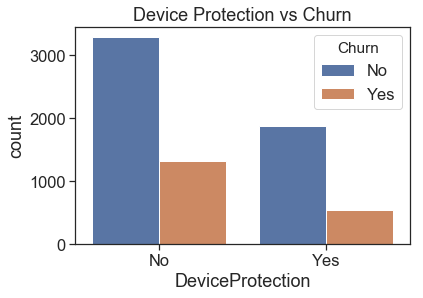

In [28]:
sns.countplot(x='DeviceProtection', hue ='Churn', data=df)
plt.title('Device Protection vs Churn')
plt.show()

Customers who don't have device protection have a higher tendency to churn the service.

### 3.12 Tech Support vs Churn

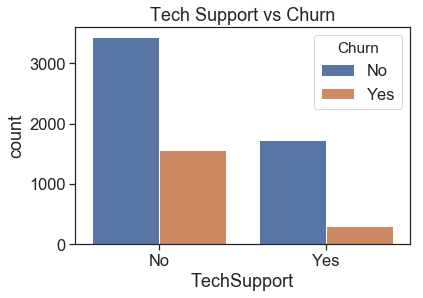

In [29]:
sns.countplot(x='TechSupport', hue ='Churn', data=df)
plt.title('Tech Support vs Churn')
plt.show()

Customers who don't have tech support have a higher tendency to churn the service.

### 3.13 Streaming TV vs Churn

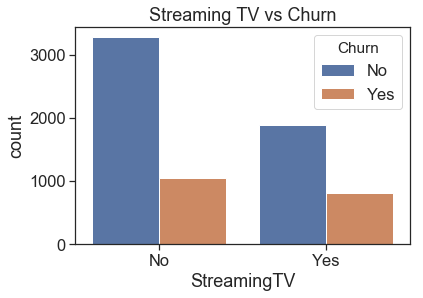

In [30]:
sns.countplot(x='StreamingTV', hue ='Churn', data=df)
plt.title('Streaming TV vs Churn')
plt.show()

Customers who have Streaming TV have a higher tendency to churn the service.

### 3.14 Streaming Movies vs Churn

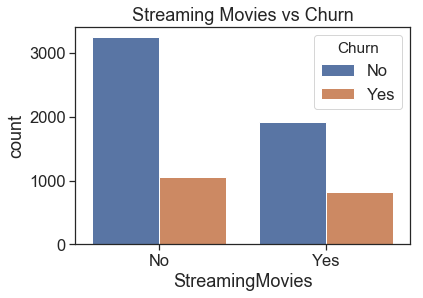

In [31]:
sns.countplot(x='StreamingMovies', hue ='Churn', data=df)
plt.title('Streaming Movies vs Churn')
plt.show()

Customers who have Streaming Movies have a higher tendency to churn the service.

### 3.15 Contract vs Churn

In [32]:
df_151 = df[df['Churn']=='Yes'][['Contract']]
df_152 = df[df['Churn']=='No'][['Contract']]
print("churn: \n", df_151['Contract'].value_counts(), "\n")
print("non churn: \n", df_152['Contract'].value_counts())

churn: 
 Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64 

non churn: 
 Month-to-month    2220
Two year          1637
One year          1306
Name: Contract, dtype: int64


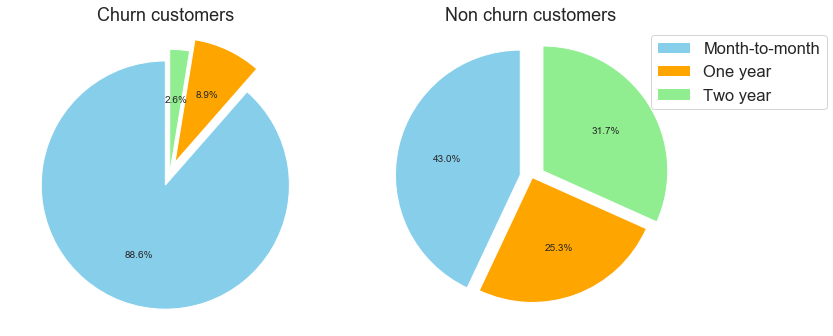

In [33]:
fig = plt.figure(figsize=(12,12))

labels = 'Month-to-month','One year','Two year'

ax1 = plt.subplot(221)
sizes = df_151['Contract'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue','orange','lightgreen'], 
       explode = (0.1, 0.1, 0),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax1.set_title('Churn customers')
ax1.axis('equal')

ax2 = plt.subplot(222)
sizes = df_152['Contract'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue', 'orange','lightgreen'],
       explode = (0.1, 0, 0.1),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax2.set_title('Non churn customers')
ax2.axis('equal')

ax1.legend(labels=labels, bbox_to_anchor=(2.7, 1))
plt.show()

Churned customers tend to use month-to-month contract than non-churn customers.

Non-churn customers tend to use one and two year contract than churned customers.

### 3.16 Paperless Billing vs Churn

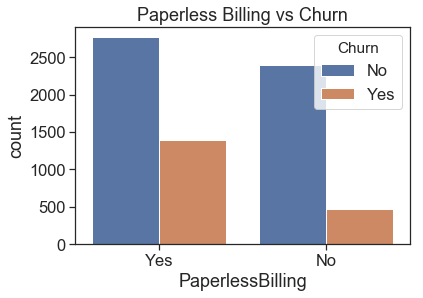

In [34]:
sns.countplot(x='PaperlessBilling', hue ='Churn', data=df)
plt.title('Paperless Billing vs Churn')
plt.show()

Customers who use paperless billing have a higher tendency to churn the service.

### 3.17 Payment Method vs Churn

In [35]:
df_171 = df[df['Churn']=='Yes'][['PaymentMethod']]
df_172 = df[df['Churn']=='No'][['PaymentMethod']]
print("churn: \n", df_171['PaymentMethod'].value_counts(), "\n")
print("non churn: \n", df_172['PaymentMethod'].value_counts())

churn: 
 Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64 

non churn: 
 Mailed check                 1296
Electronic check             1294
Credit card (automatic)      1289
Bank transfer (automatic)    1284
Name: PaymentMethod, dtype: int64


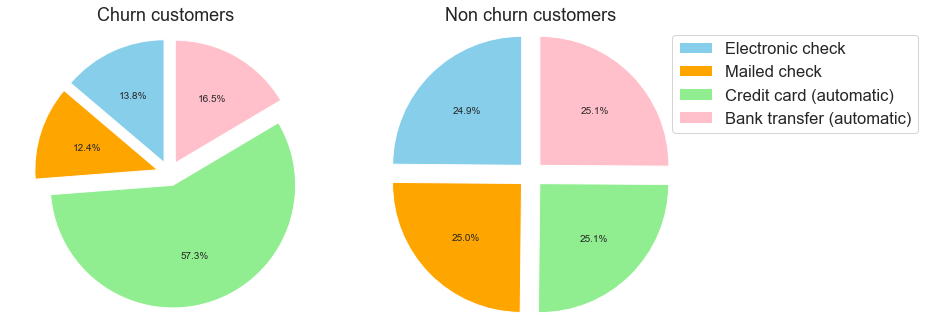

In [36]:
fig = plt.figure(figsize=(12,12))

labels = 'Electronic check','Mailed check','Credit card (automatic)','Bank transfer (automatic)'

ax1 = plt.subplot(221)
sizes = df_171['PaymentMethod'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue','orange','lightgreen','pink'], 
       explode = (0.1, 0.1, 0.1, 0.1),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax1.set_title('Churn customers')
ax1.axis('equal')

ax2 = plt.subplot(222)
sizes = df_172['PaymentMethod'].value_counts().sort_index()
plt.pie(sizes,
       shadow = False,
       colors = ['skyblue','orange', 'lightgreen', 'pink'],
       explode = (0.1, 0.1, 0.1, 0.1),
       startangle = 90,
       autopct = '%1.1f%%'
       )
ax2.set_title('Non churn customers')
ax2.axis('equal')

ax1.legend(labels=labels, bbox_to_anchor=(3, 1))
plt.show()

Churned customers tend to use credit card payment method than non-churn customers.

Non-churn customers tend to use check and bank transfer payment method than churned customers.

### 3.18 Monthly Charges vs Churn

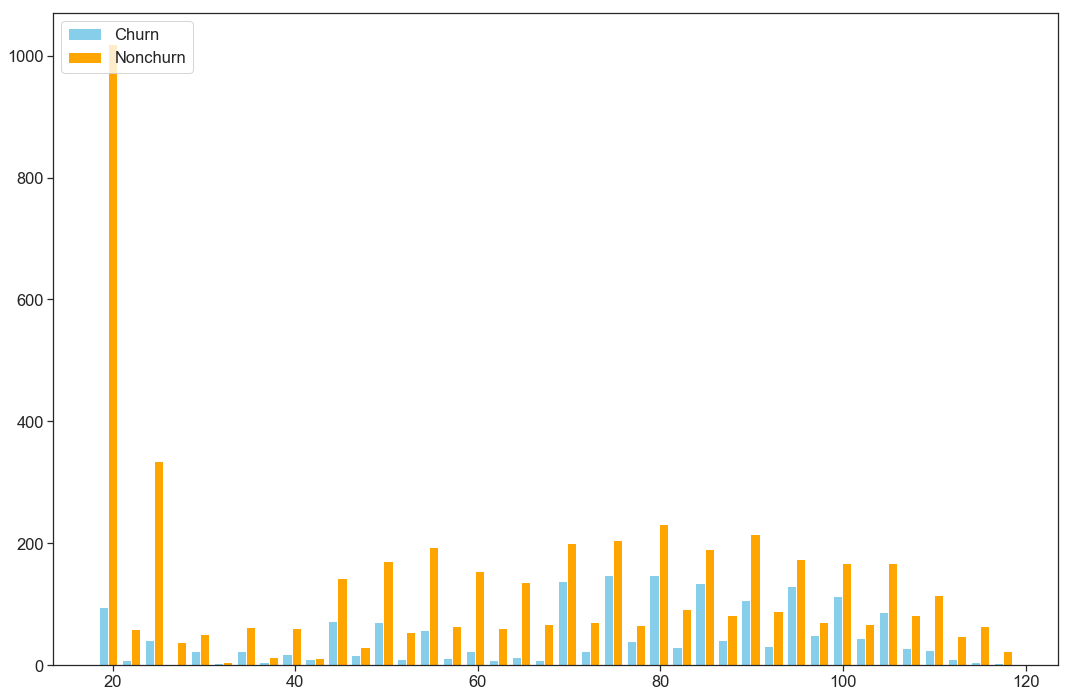

In [37]:
df_181 = df[df['Churn']=='Yes'][['MonthlyCharges']]
df_182 = df[df['Churn']=='No'][['MonthlyCharges']]

fig = plt.figure(figsize=(18,12))

Churn = df_181['MonthlyCharges']
Nonchurn = df_182['MonthlyCharges']

bins = 40
colors = ['skyblue','orange']

plt.hist([Churn, Nonchurn], bins, color = colors, label=['Churn', 'Nonchurn'])
plt.legend(loc='upper left')

plt.show()

Churned customers spend more monthly than non-churned customers.

### 3.19 Total Charges vs Churn

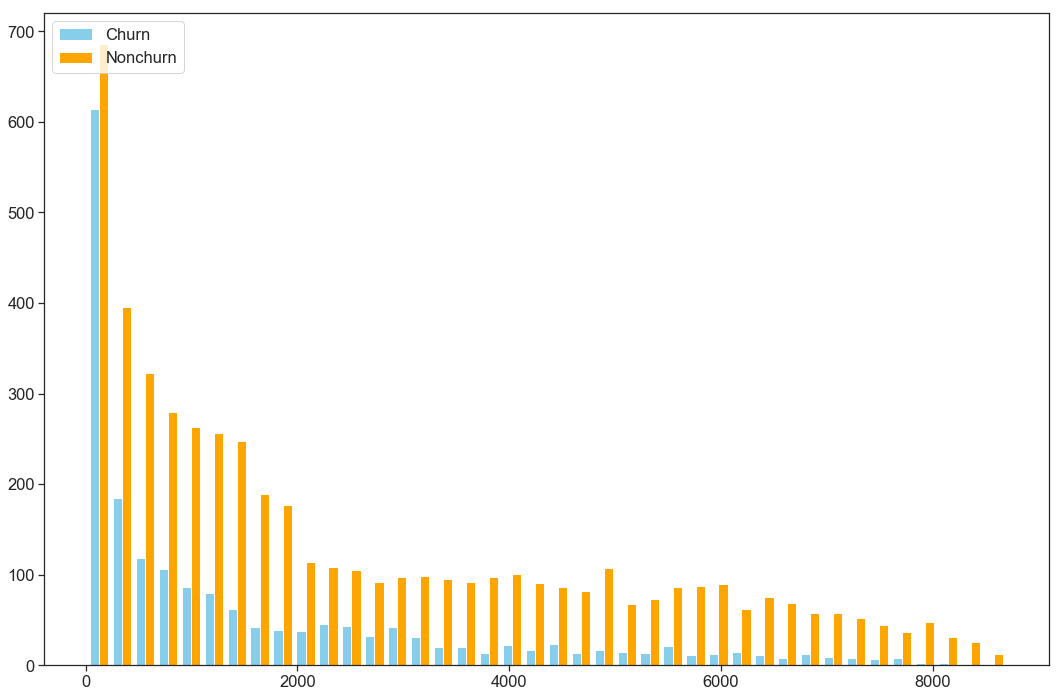

In [38]:
df_191 = df[df['Churn']=='Yes'][['TotalCharges']]
df_192 = df[df['Churn']=='No'][['TotalCharges']]

fig = plt.figure(figsize=(18,12))

Churn = df_191['TotalCharges']
Nonchurn = df_192['TotalCharges']

bins = 40
colors = ['skyblue','orange']

plt.hist([Churn, Nonchurn], bins, color = colors, label=['Churn', 'Nonchurn'])
plt.legend(loc='upper left')

plt.show()

Non-churn customers tend to spend more than churned customers.

### 3.20 Tenure Group vs Churn

In [39]:
df_201 = df[df['Churn']=='Yes'][['tenure_group']]
df_202 = df[df['Churn']=='No'][['tenure_group']]
print("churn: \n", df_201['tenure_group'].value_counts(), "\n")
print("non churn: \n", df_202['tenure_group'].value_counts())

churn: 
 Tenure_0-12     1037
Tenure_24-48     325
Tenure_12-24     294
Tenure_48-60     120
Tenure_gt_60      93
Name: tenure_group, dtype: int64 

non churn: 
 Tenure_gt_60    1314
Tenure_24-48    1269
Tenure_0-12     1138
Tenure_12-24     730
Tenure_48-60     712
Name: tenure_group, dtype: int64


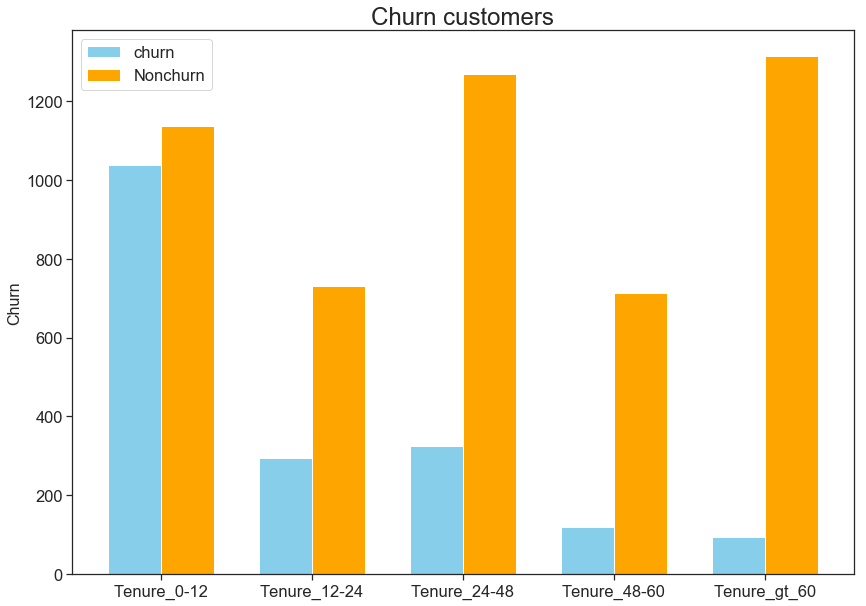

In [40]:
# draw a bar chart by groups: 
labels = ['Tenure_0-12','Tenure_12-24','Tenure_24-48','Tenure_48-60','Tenure_gt_60']
y1 = df_201['tenure_group'].value_counts().sort_index()
y2 = df_202['tenure_group'].value_counts().sort_index()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,10))
churn = ax.bar(x - width/2, y1, width, label = 'churn',color = 'skyblue')
nonchurn = ax.bar(x + width/2, y2, width, label = 'Nonchurn', color = 'orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Churn', fontsize = 16)
ax.set_title('Churn customers', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Non-churn customers tend to stay longer with the company.

## 4. Feature Engineering

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
# Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ['Churn']
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

In [43]:
# Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = cat_cols)

In [44]:
# Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [45]:
# dropping original values merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [46]:
# drop customerID
df = df.drop('customerID',axis=1)

In [47]:
df.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,No,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,No,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,Yes,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,No,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [48]:
target = df['Churn']

In [49]:
predictors = df.drop('Churn',axis=1)

## 5. Modeling

### Split to training and test dataset

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(predictors, target, random_state = 0)

### Build logistic regression model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict on test dataset

In [54]:
# test the model
predictions = model.predict(x_test)
predictions[0:5]

array(['No', 'No', 'No', 'Yes', 'Yes'], dtype=object)

## 6. Model Evaluation

### Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [56]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1311
         Yes       0.66      0.52      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

0.8088737201365188


### ROC Curve

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve

In [58]:
y_test = y_test.replace({'Yes':1, 'No':0})

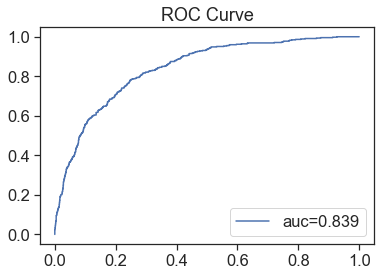

In [59]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()